In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections
import subprocess

In [2]:
grid_file_name = "/home/suspension/Desktop/grid_id.1000000.txt"
dens_file_name = "/home/suspension/Desktop/dens.1000000.grid"

level_1_x = 60
level_1_y = 40
level_2_x = 2
level_2_y = 2

level_1_cells = level_1_x * level_1_y
level_2_cells = level_2_x * level_2_y

In [3]:
grid_id = []

with open(grid_file_name, "r") as file:
    
    lines = subprocess.run(f"wc -l < {grid_file_name}", shell = True, stdout = subprocess.PIPE, stderr = subprocess.PIPE)

    lines = int(lines.stdout.decode().strip())

    for i, line in enumerate(file, start = 1):
        if i in range(10, lines + 1):
            grid_id.append(line.strip())

dens = []

with open(dens_file_name, "r") as file:

    lines = subprocess.run(f"wc -l < {grid_file_name}", shell = True, stdout = subprocess.PIPE, stderr = subprocess.PIPE)

    lines = int(lines.stdout.decode().strip())

    for i, line in enumerate(file, start = 1):
        if i in range(10, lines + 1):
            dens.append(float(line.strip()))

In [4]:
flow_prop = {}

for line_num in np.arange(0,len(grid_id) - 1, level_2_cells):
    
    grid_no = int(grid_id[line_num][:-2])
    
    flow_prop[grid_no] = np.average(dens[line_num : line_num + level_2_cells])
    
flow_prop = collections.OrderedDict(sorted(flow_prop.items()))

In [5]:
def grid_xy(grid_no, x_total):

    if (grid_no % x_total == 0):
        x = x_total
        y = grid_no // x_total
    else:
        y = grid_no // x_total + 1
        x = grid_no - (y - 1) * x_total

    return [x, y]

In [6]:
dens_contour = np.array([[0.0] * level_1_x] * level_1_y)

for key in flow_prop.keys():
    grid_index = grid_xy(key, level_1_x)
    dens_contour[grid_index[1] - 1][grid_index[0] - 1] = flow_prop[key]

dens_contour = dens_contour / np.max(dens_contour)

Locator attempting to generate 1001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


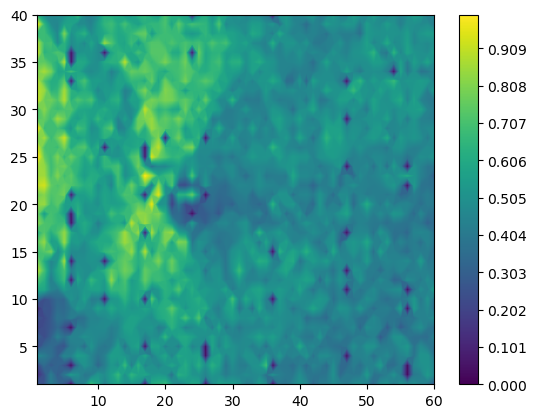

In [7]:
x = np.arange(1, level_1_x + 1, 1)
y = np.arange(1, level_1_y + 1, 1)

contour = plt.contourf(x, y, dens_contour, levels = 1000)
plt.colorbar(contour)